<a href="https://colab.research.google.com/github/mrtejas99/Dice/blob/master/Job_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import re

In [ ]:
!wget -q -nc https://github.com/mrtejas99/mrtejas99.github.io/raw/main/Indeed_Scraper4.csv -O  Indeed_Scraper4.csv
dataset= pd.read_csv("/content/Indeed_Scraper4.csv")
dataset.head()

,Company Name,Job Title,Location,Job Description,Salary,Link
0,Infochola,Data Analytics,India,"Develop R Programming, Python programming as p...",Not Available,https://in.indeed.com/rc/clk?jk=23cf8e3399d4f4...
1,WiseFinServ,Web Developer,"Noida, Uttar Pradesh","Good exp. in website designing & development, ...","₹3,00,000 - ₹4,20,000 a year",https://in.indeed.com/Infochola-jobs
2,Hydro,"Junior Technical Specialist EPiServer, Apps","Jaipur, Rajasthan",Technical Knowledge - NET programming/Episerve...,Not Available,https://in.indeed.com/jobs-in-India
3,CGI Inc,PLM DEVELOPER AND PTC WINDCHILL,"Bengaluru, Karnataka",2 The desired profile should have worked on PT...,Not Available,https://in.indeed.com/rc/clk?jk=e1802f475beb26...
4,SLK Software,Engineer - Software,"Bengaluru, Karnataka",BASIC INFORMATION ON THE POSITION.\nTo develop...,Not Available,https://in.indeed.com/Wisefinserv-jobs


Data cleaning

In [ ]:
#Replace 'Not Available' with NaN
new_cols = dataset['Salary'].replace('Not Available',np.nan)
#Only use monthly salary, index is reserved
new_cols = new_cols[new_cols.str.contains("a month", na=False)].str.replace('a month', '')
#Remove special symbols like comma and Rupees symbol
new_cols = new_cols.str.replace(',','').str.replace('\u20B9','')
#Split salary range into min and max columns
new_cols = new_cols.str.split('-', n=2, expand=True).rename(columns={0: 'min_salary', 1: 'max_salary'})
#Replace 'None' columns generated by above function with NaN
new_cols = new_cols.fillna(value=np.nan)
#If only minimum salary is given, copy it to max salary as well
new_cols['max_salary'] = new_cols['max_salary'].fillna(new_cols['min_salary'])
new_cols = new_cols.astype(float)

#new_cols.head()
df_new = pd.concat([dataset.drop('Salary', axis=1), new_cols], axis=1)

In [ ]:
skills=['react','firebase','mongodb','jsp','flask','matlab','jboss','ci/cd','jms','hibernet','sas',
        'R','Hana','Java EE','Episerver','engineering','mca','cypress','perl','spring','vb','codeigniter',
        'magneto','rdbms','testing','nosql','mvc','xml','vb script','fbd','springboot','foxpro','net',
        'rest apis','rest api','vb.net','stl','','selenium','engineer','wcm','laravel','api','sap','pl/sql',
        'Bash','seo','analytics','codeigniter','wordpress','Golang','jquery','spark','apache','BE','Bsc','mba',
        'django','c','python','HTML5','html','Java','c++','C#','R','Go','css','Javascript','swift','Php','shell',
        'kotlin','perl','SQL','typescript','Lua','SQL','Android','powershell','.net','Visual Basic .NET','aws','asp','asp.net','typing']
skills = [x.lower() for x in skills]
skill_list = []
for index, row in df_new.iterrows():
  S = list(filter(lambda w: w.lower() in skills, re.split(r'\W+', row['Job Description'])))
  if len(S) > 0:
    skill_list.append(','.join(S))
  else:
    skill_list.append(np.nan)

df_new['Skills'] = skill_list

df_new=df_new.dropna()
df_new

,Company Name,Job Title,Location,Job Description,Link,min_salary,max_salary,Skills
151,Intelous IO,Prepress Operator,"Bengaluru, Karnataka","Die, Foil, Emboss File Prepration.\nDigital Pr...",https://in.indeed.com/cmp/Chase-2,20000.0,20000.0,
152,Calmove Technologies Pvt Ltd,HTML Developer,"Thiruvananthapuram, Kerala",Fair understanding of JavaScript programming a...,https://in.indeed.com/cmp/Chase-2/reviews,8919.0,29787.0,"JavaScript,"
153,Gems Digital Media Private LTD.,HTML Developer,"Ahmedabad, Gujarat",Developing skills and expertise in appropriate...,"https://in.indeed.com/JPMorgan-Chase-Bank,-N.a...",35000.0,35000.0,"HTML,Javascript,jQuery,"
154,Fraxinus IT Solutions,HTML Developer,"Surat, Gujarat",Fair understanding of JavaScript programming a...,"https://in.indeed.com/jobs-in-Bengaluru,-Karna...",9321.0,31576.0,"JavaScript,"
160,M/S OTECHNIX,Computer trainer in programming language,"Guwahati, Assam",\*Urgently required contract basis software pr...,https://in.indeed.com/rc/clk?cmp=M%2FS-OTECHNI...,8129.0,25859.0,","
...,...,...,...,...,...,...,...,...
1060,Yennes,TDL DEVELOPER,"Madurai, Tamil Nadu",Good Knowledge in Tally/Accounting.\nExperienc...,"https://in.indeed.com/jobs-in-BTM-Layout-1,-Be...",20000.0,25000.0,"C,C,"
1061,Unijob Solution & Training Pvt Ltd,Software Engineer,"Pune, Maharashtra","\* *Strong communication skills, knowledge & p...",https://in.indeed.com/career/web-developer/sal...,25000.0,30000.0,",Java,Javascript,HTML,SQL,CSS,C,C,SQL,"
1062,Seahawk,WordPress Developer,"Remote in Ahmedabad, Gujarat",We are seeking for a WordPress Developer with ...,https://in.indeed.com/company/Medyug-Technolog...,30000.0,30000.0,"WordPress,PHP,HTML5,"
1063,Backstage Pass Institute of Gaming and Technology,Computer Science Faculty,"Hyderabad, Telangana","In this role, you will be responsible for cond...",https://in.indeed.com/Medyug-Technology-Pvt-Lt...,40000.0,60000.0,"be,"


In [ ]:
len(skills)

86

Find the correlation between numberical values in the dataset

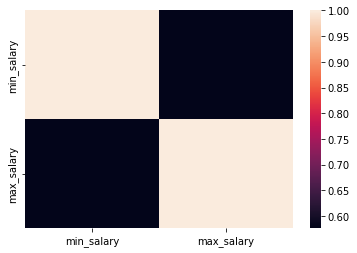

In [ ]:
sns.heatmap(df_new.corr())

In [ ]:
df_new['LocationState'] = df_new['Location'].str.split(',', expand=True)[1]
df_new.head()

,Company Name,Job Title,Location,Job Description,Link,min_salary,max_salary,Skills,LocationState
151,Intelous IO,Prepress Operator,"Bengaluru, Karnataka","Die, Foil, Emboss File Prepration.\nDigital Pr...",https://in.indeed.com/cmp/Chase-2,20000.0,20000.0,,Karnataka
152,Calmove Technologies Pvt Ltd,HTML Developer,"Thiruvananthapuram, Kerala",Fair understanding of JavaScript programming a...,https://in.indeed.com/cmp/Chase-2/reviews,8919.0,29787.0,"JavaScript,",Kerala
153,Gems Digital Media Private LTD.,HTML Developer,"Ahmedabad, Gujarat",Developing skills and expertise in appropriate...,"https://in.indeed.com/JPMorgan-Chase-Bank,-N.a...",35000.0,35000.0,"HTML,Javascript,jQuery,",Gujarat
154,Fraxinus IT Solutions,HTML Developer,"Surat, Gujarat",Fair understanding of JavaScript programming a...,"https://in.indeed.com/jobs-in-Bengaluru,-Karna...",9321.0,31576.0,"JavaScript,",Gujarat
160,M/S OTECHNIX,Computer trainer in programming language,"Guwahati, Assam",\*Urgently required contract basis software pr...,https://in.indeed.com/rc/clk?cmp=M%2FS-OTECHNI...,8129.0,25859.0,",",Assam


In [ ]:
#Clean data of bad locations
df_new['LocationState'] = df_new['LocationState'].str.replace(
    'Pune', 'Maharashtra').str.replace(
    'Thiruvananthapuram', 'Kerala').str.replace(
    'Hyderabad', 'Telangana').str.replace(
    'Kolkata', 'West Bengal').str.replace(
    'Chennai', 'Tamil Nadu').str.replace(
    'Bengaluru', 'Karnataka')

df_new['LocationState'] = df_new['LocationState'].str.replace('\+\d locations', '')
#pd.set_option('display.max_rows', None)
df_new['LocationState']
#pd.reset_option('all')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


151        Karnataka
152           Kerala
153          Gujarat
154          Gujarat
160            Assam
            ...     
1060      Tamil Nadu
1061     Maharashtra
1062         Gujarat
1063       Telangana
1065          Kerala
Name: LocationState, Length: 126, dtype: object

Find the variation in salary in each state

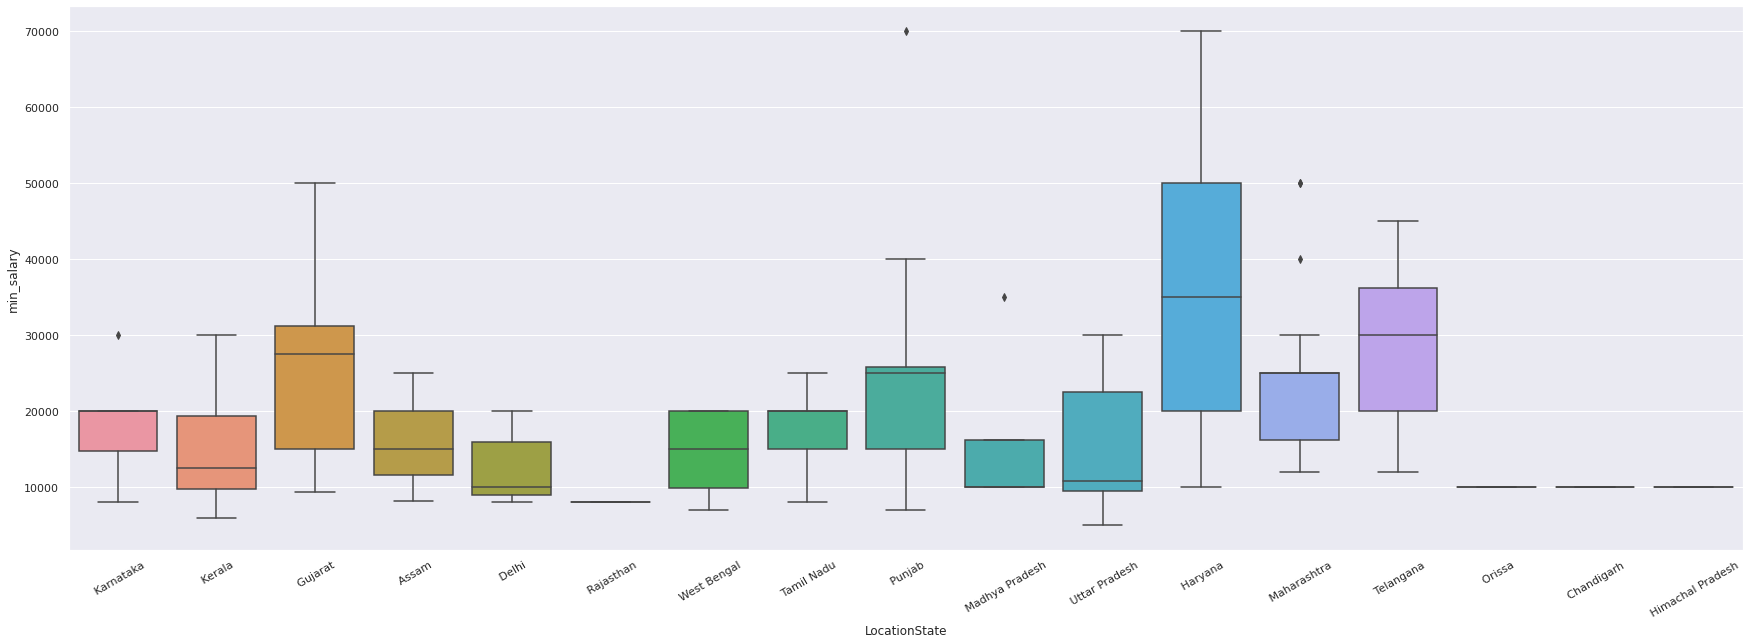

In [ ]:
sns.set(rc={"figure.figsize":(30,10)})

ax = sns.boxplot(x="LocationState", y="min_salary", data=df_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax

Find out which states have the highest number of job vacancies

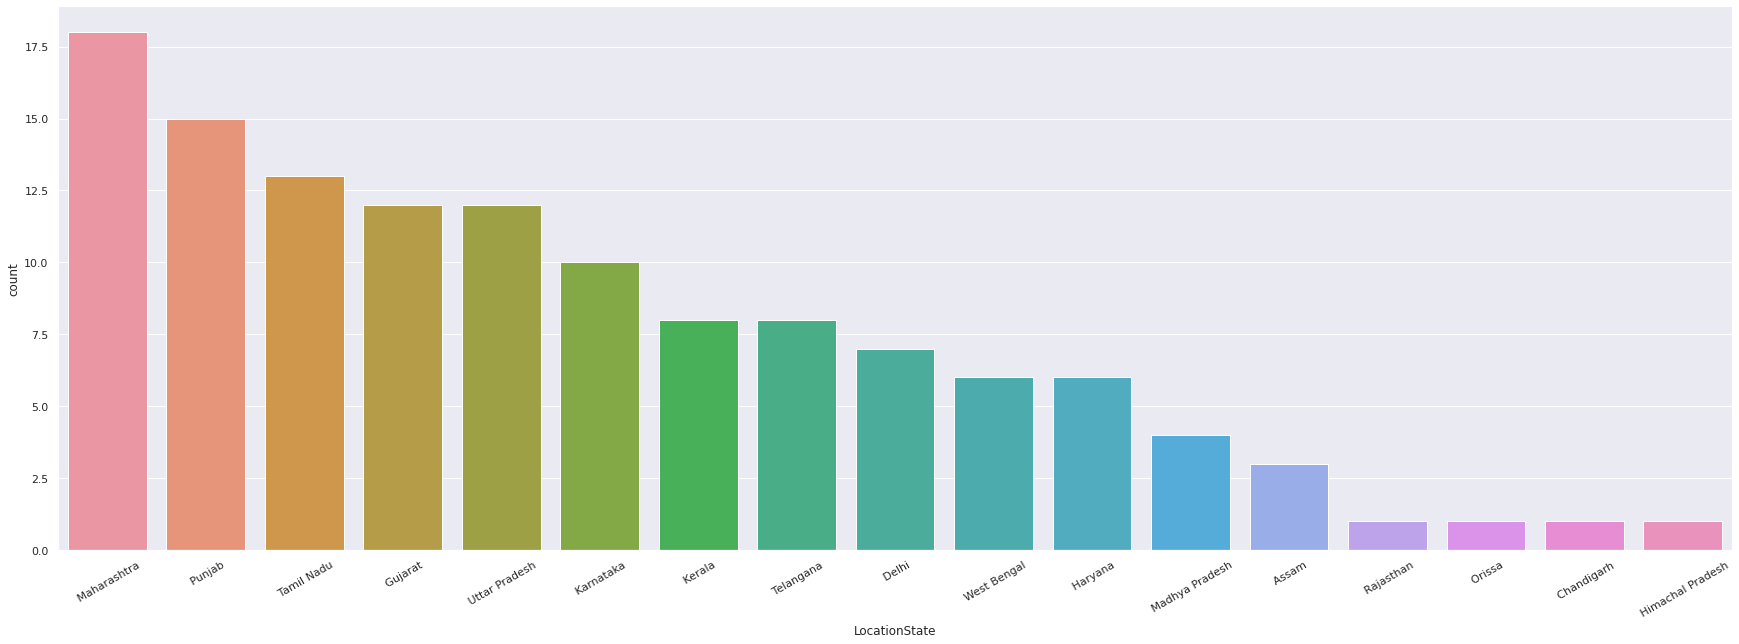

In [ ]:
sns.set(rc={"figure.figsize":(30,10)})

ax=sns.countplot(x="LocationState",data=df_new, order=df_new['LocationState'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax

What are the most demanding skills for a job now-a-days?

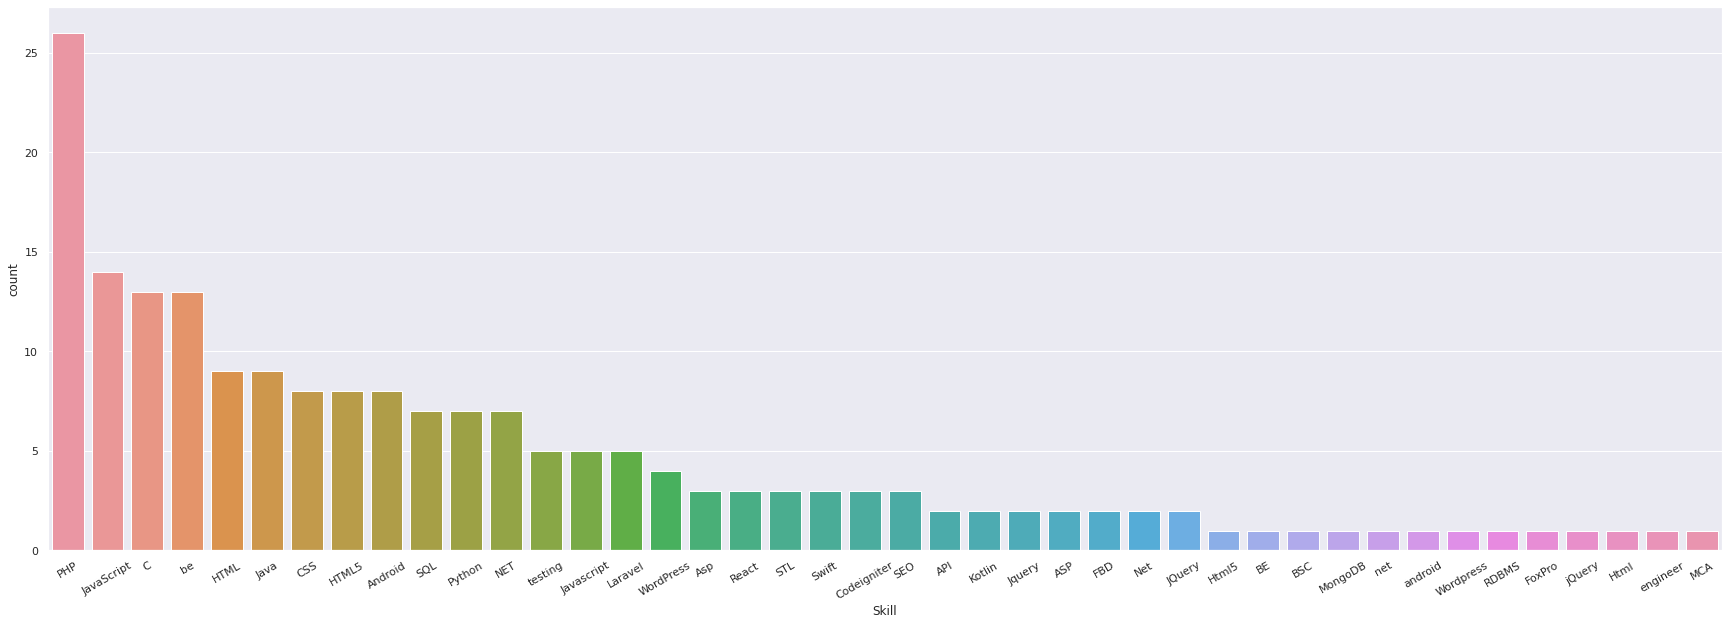

In [ ]:
sns.set(rc={"figure.figsize":(30,10)})

all_job_skills = []
for row in df_new['Skills']:
  row_split = {x for x in row.strip().split(',') if len(x.strip()) > 0}
  if len(row_split) > 0:
    for skill in row_split:
      all_job_skills.append(skill)
skill_series = pd.Series(data=all_job_skills, name="Skill")

ax=sns.countplot(x=skill_series, order=skill_series.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax

Find the most common salary offered to an employee(maximum)

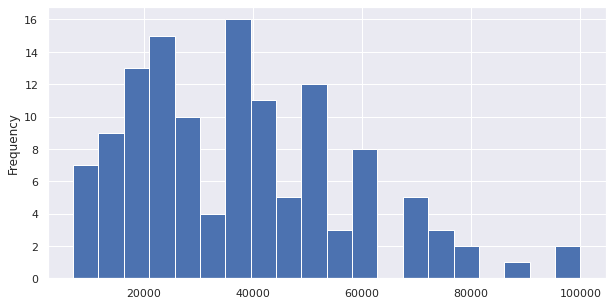

In [ ]:
df_new["max_salary"].plot.hist(bins=20,figsize=(10,5))

Find the most common salary offered to an employee(minimum)

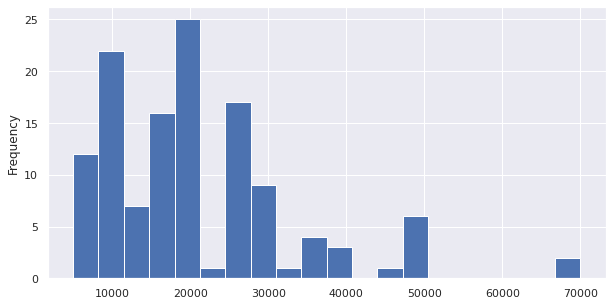

In [ ]:
df_new["min_salary"].plot.hist(bins=20,figsize=(10,5))

Tensorflow validation
https://colab.research.google.com/drive/1OQZTKACTpGpso2pKd0WTRZDVUBL2-so7?usp=sharing

Pandas profiling
https://colab.research.google.com/drive/1qrOq9NlJuWHGjz4hVFfFVXeg35hoaMPb?usp=sharing


Model construction

In [ ]:
df_new.head()

,Company Name,Job Title,Location,Job Description,Link,min_salary,max_salary,Skills,LocationState
151,Intelous IO,Prepress Operator,"Bengaluru, Karnataka","Die, Foil, Emboss File Prepration.\nDigital Pr...",https://in.indeed.com/cmp/Chase-2,20000.0,20000.0,,Karnataka
152,Calmove Technologies Pvt Ltd,HTML Developer,"Thiruvananthapuram, Kerala",Fair understanding of JavaScript programming a...,https://in.indeed.com/cmp/Chase-2/reviews,8919.0,29787.0,"JavaScript,",Kerala
153,Gems Digital Media Private LTD.,HTML Developer,"Ahmedabad, Gujarat",Developing skills and expertise in appropriate...,"https://in.indeed.com/JPMorgan-Chase-Bank,-N.a...",35000.0,35000.0,"HTML,Javascript,jQuery,",Gujarat
154,Fraxinus IT Solutions,HTML Developer,"Surat, Gujarat",Fair understanding of JavaScript programming a...,"https://in.indeed.com/jobs-in-Bengaluru,-Karna...",9321.0,31576.0,"JavaScript,",Gujarat
160,M/S OTECHNIX,Computer trainer in programming language,"Guwahati, Assam",\*Urgently required contract basis software pr...,https://in.indeed.com/rc/clk?cmp=M%2FS-OTECHNI...,8129.0,25859.0,",",Assam


Find number of jobs for each job title

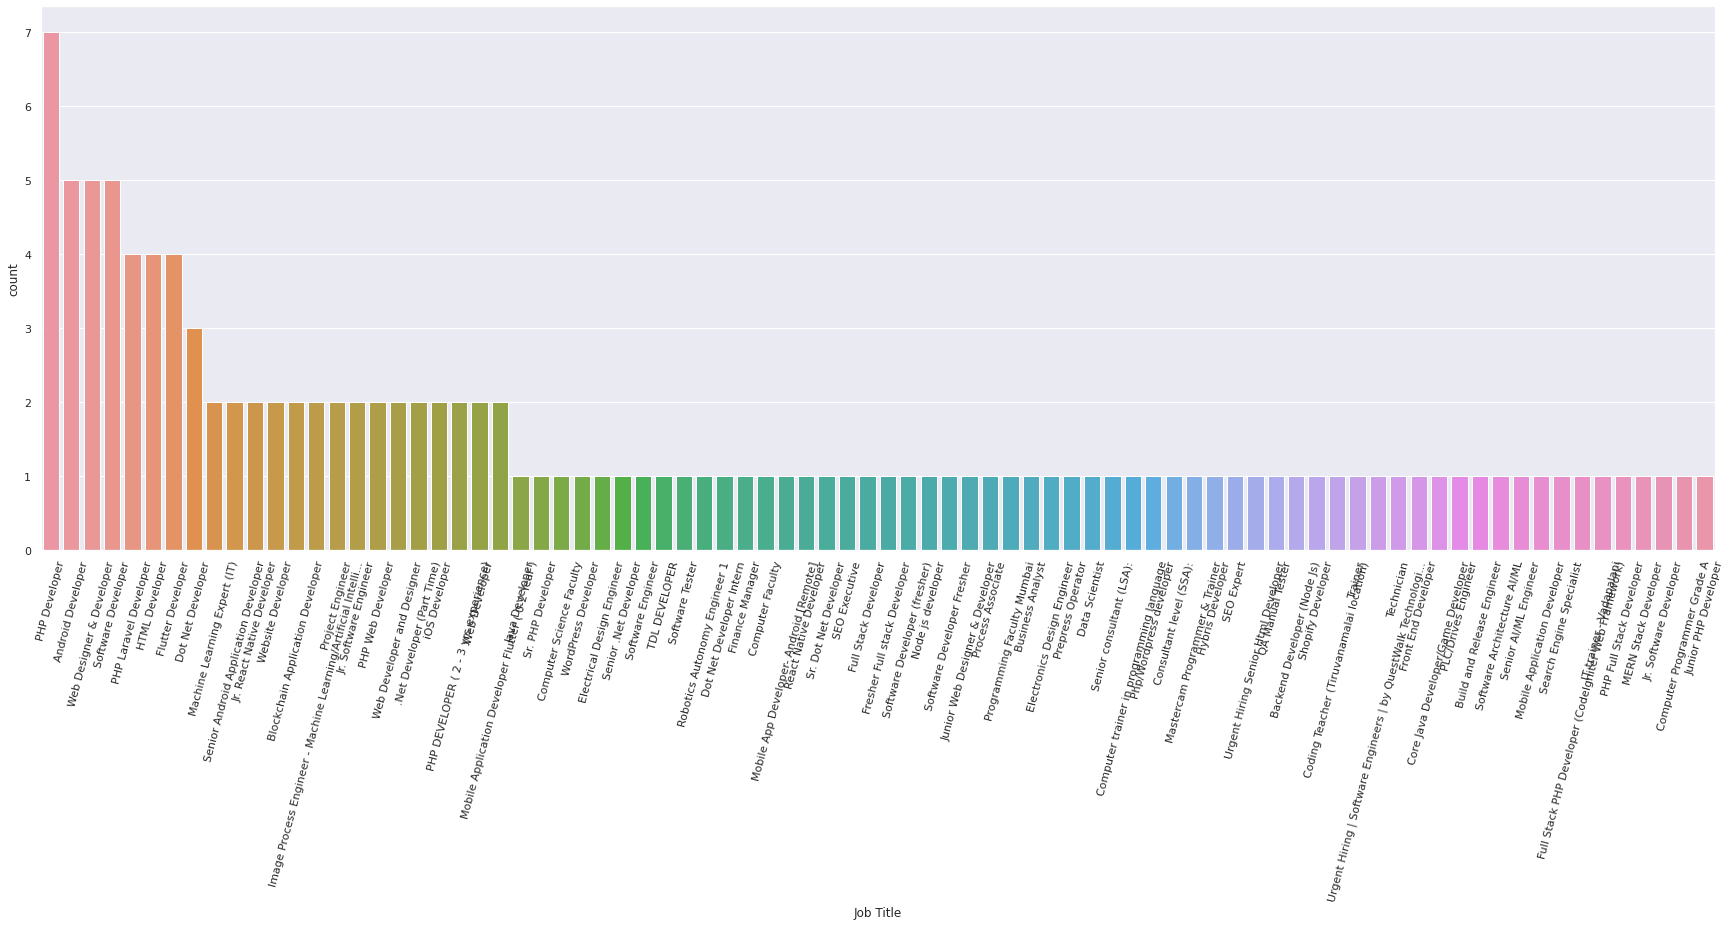

In [ ]:
sns.set(rc={"figure.figsize":(30,10)})

ax=sns.countplot(x="Job Title",data=df_new, order=df_new['Job Title'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_numeric_skills = (pd.DataFrame(mlb.fit_transform(df_new['Skills'].str.split(',')), columns=mlb.classes_, index=df_new.index))

In [ ]:
df_numeric_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 151 to 1065
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0                126 non-null    int64
 1   API          126 non-null    int64
 2   ASP          126 non-null    int64
 3   Android      126 non-null    int64
 4   Asp          126 non-null    int64
 5   BE           126 non-null    int64
 6   BSC          126 non-null    int64
 7   C            126 non-null    int64
 8   CSS          126 non-null    int64
 9   Codeigniter  126 non-null    int64
 10  FBD          126 non-null    int64
 11  FoxPro       126 non-null    int64
 12  HTML         126 non-null    int64
 13  HTML5        126 non-null    int64
 14  Html         126 non-null    int64
 15  Html5        126 non-null    int64
 16  JQuery       126 non-null    int64
 17  Java         126 non-null    int64
 18  JavaScript   126 non-null    int64
 19  Javascript   126 non-null    int64
 20  Jquery 

Split the data into test and train 


In [ ]:
#split data into test and train
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_numeric_skills, df_new['Job Title'], test_size=0.2,random_state=42)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


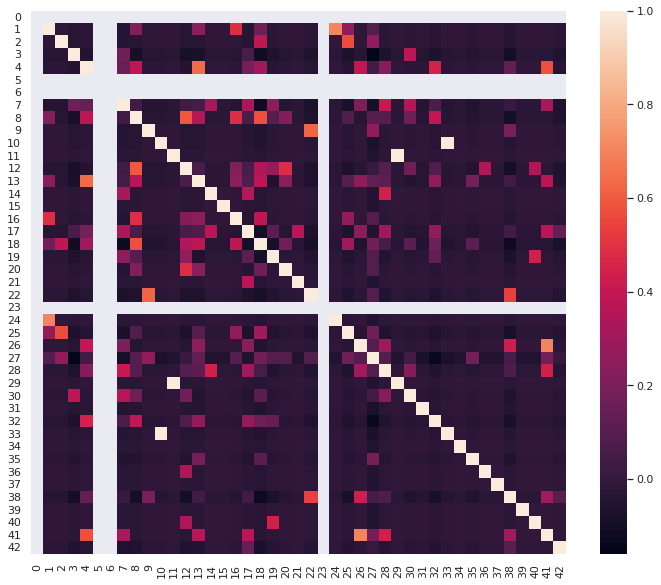

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
corr = np.corrcoef(X_train, rowvar=False)
sns.heatmap(corr)

In [ ]:
accuracy_list = []
X_train.shape


(100, 43)

PCA

Text(0, 0.5, 'Explained variance ratio')

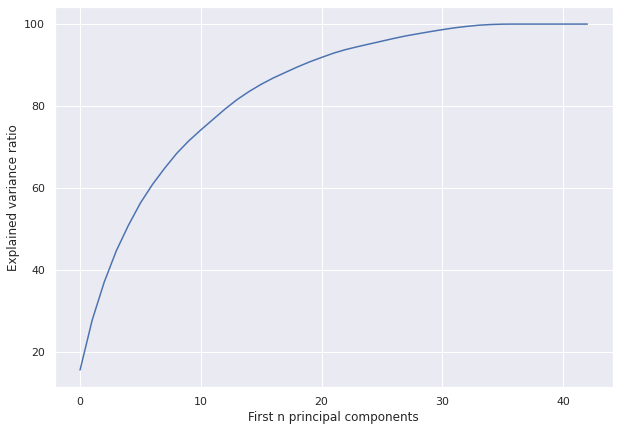

In [ ]:
#Find optimal no of components
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.figure(figsize=(10,7))
ax = plt.axes()
ax.plot(var1)
ax.set_xlabel('First n principal components')
ax.set_ylabel('Explained variance ratio')

In [ ]:
#PCA
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=20)
X_sklearn_train = sklearn_pca.fit_transform(X_train)
print(X_sklearn_train.shape)
X_sklearn_test = sklearn_pca.fit_transform(X_test)
print(X_sklearn_test.shape)


(100, 20)
(26, 20)


Text(0.5, 0, '$PC2$')

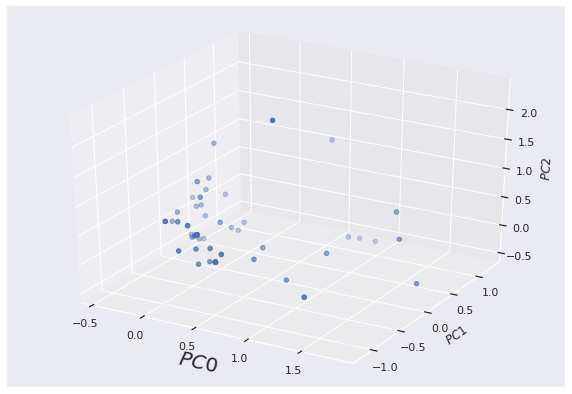

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X_sklearn_train[:,0], X_sklearn_train[:,1],X_sklearn_train[:,2], 'gray')
ax.set_xlabel('$PC0$', fontsize=20)
ax.set_ylabel('$PC1$')
ax.set_zlabel('$PC2$')

Decison tree model

Test accuracy is 0.12 and Train accuracy is 0.62


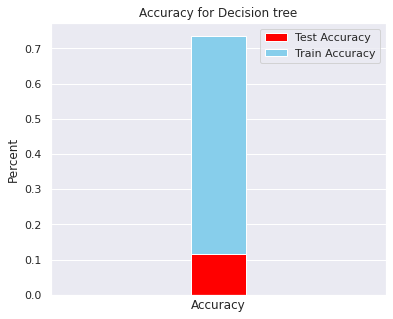

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,make_scorer, classification_report,accuracy_score

depth = 28
trainAccuracy = 0
testAccuracy = 0

clf_dt = DecisionTreeClassifier(max_depth=depth)
clf_dt = clf_dt.fit(X_train, y_train)
Y_predTrain = clf_dt.predict(X_train)
Y_predTest = clf_dt.predict(X_test)
trainAccuracy = accuracy_score(y_train, Y_predTrain)
testAccuracy = accuracy_score(y_test, Y_predTest)

accuracy_list.append(("Decision Tree", testAccuracy, trainAccuracy))

sns.set(rc={"figure.figsize":(6,5)})
df = pd.DataFrame({'Test Accuracy':[testAccuracy], 'Train Accuracy': [trainAccuracy]})
ax1 = df.plot(kind='bar', stacked=True, color=['red', 'skyblue'], width=0.1, xlabel='Accuracy', ylabel='Percent', title='Accuracy for Decision tree', xticks=[])
print(f"Test accuracy is {testAccuracy:.2f} and Train accuracy is {trainAccuracy:.2f}")


Test accuracy is 0.12 and Train accuracy is 0.59


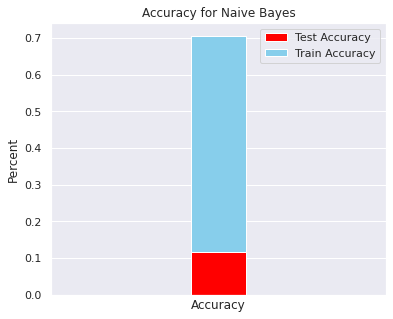

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB

alpha=0.05
trainAccuracy = 0
testAccuracy = 0

clf_nb = BernoulliNB(alpha=alpha)
clf_nb = clf_nb.fit(X_train, y_train)
Y_predTrain = clf_nb.predict(X_train)
Y_predTest = clf_nb.predict(X_test)
trainAccuracy = accuracy_score(y_train, Y_predTrain)
testAccuracy = accuracy_score(y_test, Y_predTest)

accuracy_list.append(("NB(Bernoulli)", testAccuracy, trainAccuracy))

sns.set(rc={"figure.figsize":(6,5)})
df = pd.DataFrame({'Test Accuracy':[testAccuracy], 'Train Accuracy': [trainAccuracy]})
ax2 = df.plot(kind='bar', stacked=True, color=['red', 'skyblue'], width=0.1, xlabel='Accuracy', ylabel='Percent', title='Accuracy for Naive Bayes', xticks=[])

print(f"Test accuracy is {testAccuracy:.2f} and Train accuracy is {trainAccuracy:.2f}")

Test accuracy is 0.12 and Train accuracy is 0.58


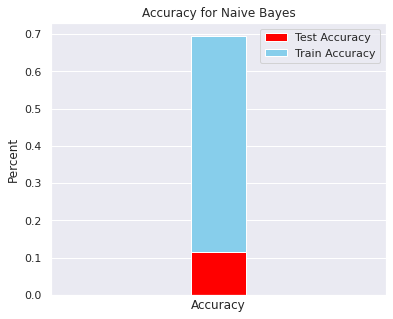

In [ ]:
#Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB

var_smoothing=0.05
trainAccuracy = 0
testAccuracy = 0

clf1 = GaussianNB(var_smoothing=var_smoothing)
clf1 = clf1.fit(X_train, y_train)
Y_predTrain = clf1.predict(X_train)
Y_predTest = clf1.predict(X_test)
trainAccuracy = accuracy_score(y_train, Y_predTrain)
testAccuracy = accuracy_score(y_test, Y_predTest)

accuracy_list.append(("NB(Gaussian)", testAccuracy, trainAccuracy))

sns.set(rc={"figure.figsize":(6,5)})
df = pd.DataFrame({'Test Accuracy':[testAccuracy], 'Train Accuracy': [trainAccuracy]})
ax3 = df.plot(kind='bar', stacked=True, color=['red', 'skyblue'], width=0.1, xlabel='Accuracy', ylabel='Percent', title='Accuracy for Naive Bayes', xticks=[])

print(f"Test accuracy is {testAccuracy:.2f} and Train accuracy is {trainAccuracy:.2f}")

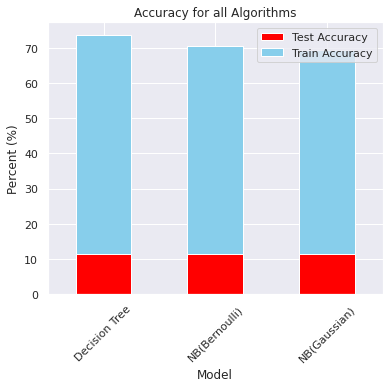

In [ ]:
#All charts
sns.set(rc={"figure.figsize":(6,5)})
acc_df = pd.DataFrame(accuracy_list, columns=['ModelName', 'Test Accuracy', 'Train Accuracy'])
acc_df['Test Accuracy'] *= 100
acc_df['Train Accuracy'] *= 100
acc_df.plot(x='ModelName', kind='bar', stacked=True,
            color=['red', 'skyblue'], width=0.5,
            xlabel='Model', ylabel='Percent (%)',
            title='Accuracy for all Algorithms', rot=45).legend(loc='best')